<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pybaseball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pybaseball import statcast

In [5]:
startDate = "2019-05-01"
endDate = "2019-06-01"
data = statcast(startDate, endDate)
data.head()

This is a large query, it may take a moment to complete
Completed sub-query from 2019-05-01 to 2019-05-06
Completed sub-query from 2019-05-07 to 2019-05-12
Completed sub-query from 2019-05-13 to 2019-05-18
Completed sub-query from 2019-05-19 to 2019-05-24
Completed sub-query from 2019-05-25 to 2019-05-30
Completed sub-query from 2019-05-31 to 2019-06-01


,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,202,SL,2019-06-01,86.2,0.5783,6.2574,Aroldis Chapman,646240.0,547973.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Rafael Devers grounds out, first baseman Luke ...",R,L,L,NYY,BOS,X,3.0,ground_ball,0.0,0.0,2019.0,-0.9914,0.3689,-0.3198,2.3129,605141.0,NaN,NaN,2.0,9.0,Top,153.50,171.52,...,-27.7191,3.3800,1.5900,9.0,79.5,-15.0,86.030,2524.0,6.240,567489.0,547973.0,596142.0,572228.0,518934.0,570482.0,650402.0,458731.0,543305.0,457727.0,54.2595,0.055,0.052,0.0,1.0,0.0,0.0,2.0,77.0,1.0,Slider,5.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Strategic
1,204,SL,2019-06-01,83.5,0.4599,6.1860,Aroldis Chapman,502110.0,547973.0,grounded_into_double_play,hit_into_play,NaN,NaN,NaN,NaN,12.0,"J.D. Martinez grounds into a double play, shor...",R,R,L,NYY,BOS,X,6.0,ground_ball,1.0,0.0,2019.0,-0.9417,0.4182,0.8426,3.0666,NaN,605141.0,643217.0,0.0,9.0,Top,113.98,143.17,...,-28.0311,3.6600,1.7300,119.0,70.2,13.0,82.845,2433.0,6.096,567489.0,547973.0,596142.0,572228.0,518934.0,570482.0,650402.0,458731.0,543305.0,457727.0,54.4040,0.387,0.354,0.0,1.0,0.0,0.0,2.0,76.0,2.0,Slider,5.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard
2,209,FF,2019-06-01,98.3,0.5847,6.1600,Aroldis Chapman,502110.0,547973.0,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,L,NYY,BOS,B,NaN,NaN,0.0,0.0,2019.0,0.5295,1.5829,0.4717,1.3314,NaN,605141.0,643217.0,0.0,9.0,Top,NaN,NaN,...,-7.7970,3.6600,1.7300,NaN,NaN,NaN,98.790,2395.0,6.718,567489.0,547973.0,596142.0,572228.0,518934.0,570482.0,650402.0,458731.0,543305.0,457727.0,53.7815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.0,4-Seam Fastball,5.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Standard
3,213,SL,2019-06-01,83.3,0.4712,6.1457,Aroldis Chapman,643217.0,547973.0,single,hit_into_play_no_out,NaN,NaN,NaN,NaN,7.0,Andrew Benintendi singles on a ground ball to ...,R,L,L,NYY,BOS,X,9.0,ground_ball,2.0,1.0,2019.0,-0.8417,0.3144,-0.4552,1.8776,NaN,NaN,605141.0,0.0,9.0,Top,173.82,104.47,...,-28.5146,3.3300,1.5800,61.0,91.6,3.2,83.397,2369.0,6.294,567489.0,547973.0,596142.0,572228.0,518934.0,570482.0,650402.0,458731.0,543305.0,457727.0,54.2055,0.460,0.416,0.9,1.0,1.0,0.0,4.0,75.0,4.0,Slider,5.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Strategic
4,217,SL,2019-06-01,83.8,0.5424,6.1915,Aroldis Chapman,643217.0,547973.0,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,NaN,R,L,L,NYY,BOS,S,NaN,NaN,2.0,0.0,2019.0,-0.9118,0.4793,-0.1599,2.8320,NaN,NaN,605141.0,0.0,9.0,Top,NaN,NaN,...,-27.1567,3.3064,1.5659,NaN,NaN,NaN,83.851,2380.0,6.292,567489.0,547973.0,596142.0,572228.0,518934.0,570482.0,650402.0,458731.0,543305.0,457727.0,54.2077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,3.0,Slider,5.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,Standard,Strategic


In [7]:
data.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

In [0]:
data.dropna(subset = ['launch_speed', 'launch_angle', 'estimated_ba_using_speedangle'], inplace = True)

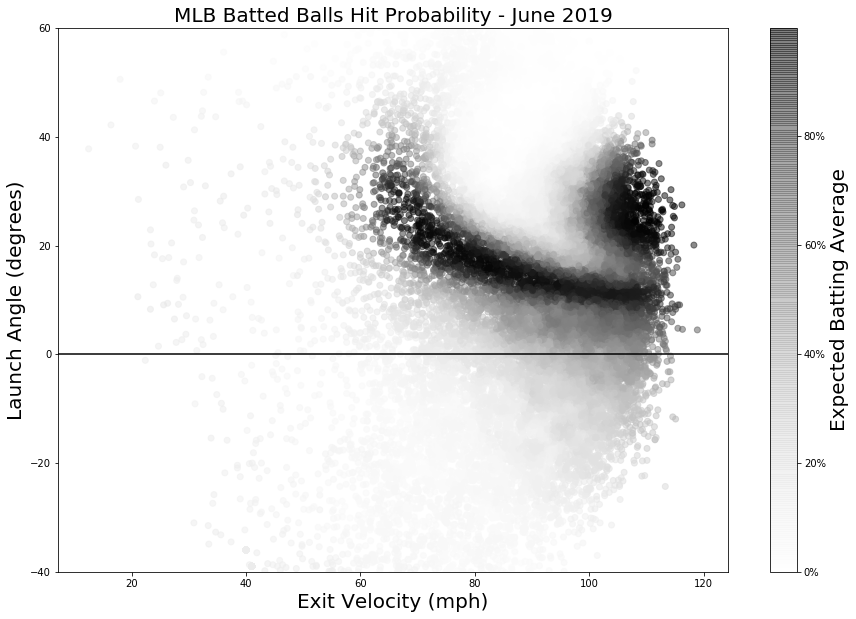

In [27]:
fig = plt.figure(figsize = (15, 10))
ax = plt.scatter(data['launch_speed'], data['launch_angle'], c = 100*data['estimated_ba_using_speedangle'], cmap='Greys', alpha = 0.5)
plt.ylabel('Launch Angle (degrees)', size = 20)
plt.xlabel('Exit Velocity (mph)', size = 20)
plt.title('MLB Batted Balls Hit Probability - June 2019', size = 20)
plt.ylim(-40, 60)
plt.axhline(0, color = 'k')
cbar = fig.colorbar(ax, format='%.0f%%');
cbar.set_label('Expected Batting Average', size = 20)

**Figure 1:** This chart plots the launch angle of a baseball vs. its exit velocity for all batted balls during the month of June 2019. The colors display the balls likelhood of being a hit, with a darker hue representing a higher likelihood of a hit. The most noticeable trend is that balls with lower velocities need to be hit with a more ideal launch angle (45 degrees) to be considered a hit, while harder-hit balls can be hit at lower angles and have the same probability of being a hit.

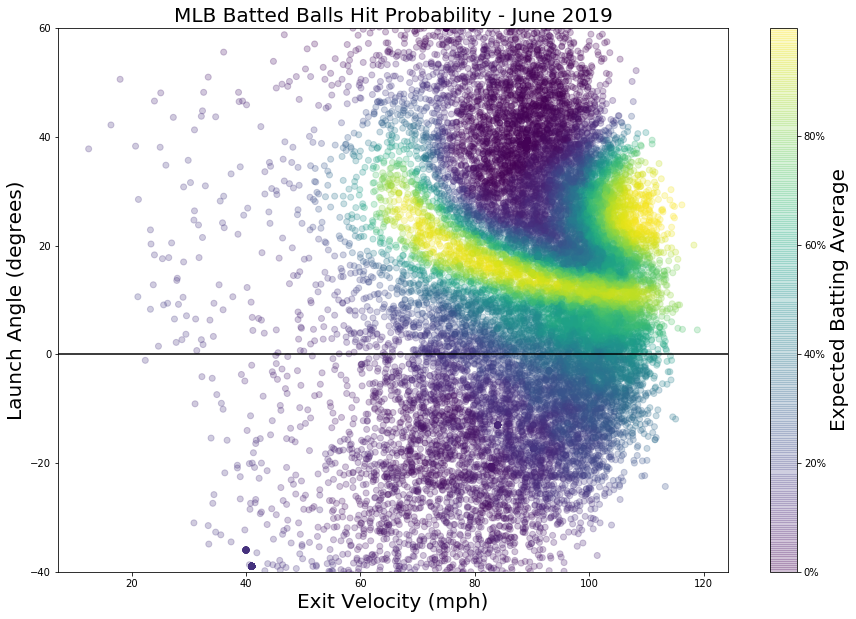

In [26]:
fig = plt.figure(figsize = (15, 10))
ax = plt.scatter(data['launch_speed'], data['launch_angle'], c = 100*data['estimated_ba_using_speedangle'], alpha = 0.25)
plt.ylabel('Launch Angle (degrees)', size = 20)
plt.xlabel('Exit Velocity (mph)', size = 20)
plt.title('MLB Batted Balls Hit Probability - June 2019', size = 20)
plt.ylim(-40, 60)
plt.axhline(0, color = 'k')
cbar = fig.colorbar(ax, format='%.0f%%')
cbar.set_label('Expected Batting Average', size = 20);

**Figure 2:** This chart plots the launch angle of a baseball vs. its exit velocity for all batted balls during the month of June 2019. The colors display the balls likelhood of being a hit, with the yellow hue representing a higher likelihood of a hit and the purple hue representing a lower likelihood of a hit. The most noticeable trend is that balls with lower velocities need to be hit with a more ideal launch angle (45 degrees) to be considered a hit, while harder-hit balls can be hit at lower angles and have the same probability of being a hit.

No handles with labels found to put in legend.


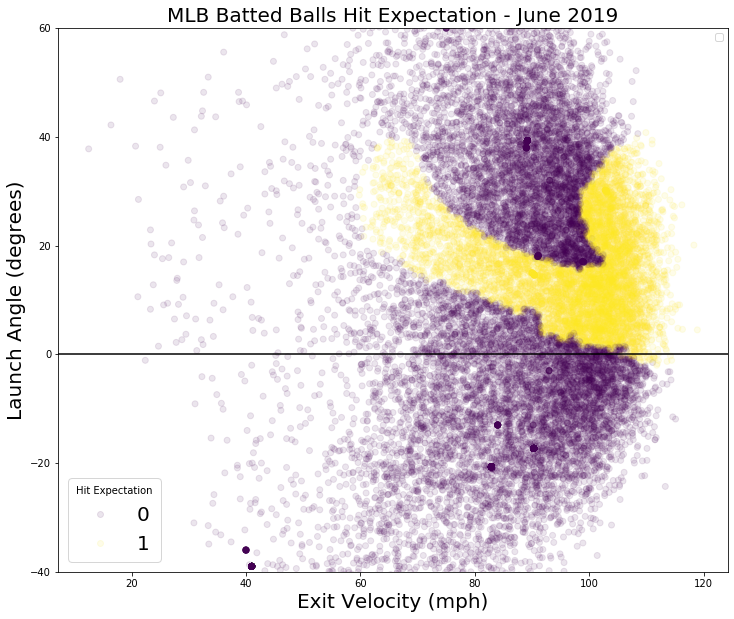

In [29]:
fig, ax = plt.subplots(figsize = (12, 10))
scatter = ax.scatter(data['launch_speed'], data['launch_angle'], c = data['estimated_ba_using_speedangle'] > 0.5, alpha = 0.1)
plt.ylabel('Launch Angle (degrees)', size = 20)
plt.xlabel('Exit Velocity (mph)', size = 20)
plt.title('MLB Batted Balls Hit Expectation - June 2019', size = 20)
plt.ylim(-40, 60)
plt.axhline(0, color = 'k')
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Hit Expectation", fontsize = 20);
ax.add_artist(legend);
plt.legend();

**Figure 3:** This chart plots the launch angle of a baseball vs. its exit velocity for all batted balls during the month of June 2019. The colors display a binary classifier of whether or not a ball is expected to be a hit. If a batted ball has a 50% chance or higher of being a hit, it is colored in yellow. If the probability is less than 50%, it it yellow. The most noticeable trend is that balls with lower velocities need to be hit with a more ideal launch angle (45 degrees) to be considered a hit, while harder-hit balls can be hit at lower angles and have the same probability of being a hit.